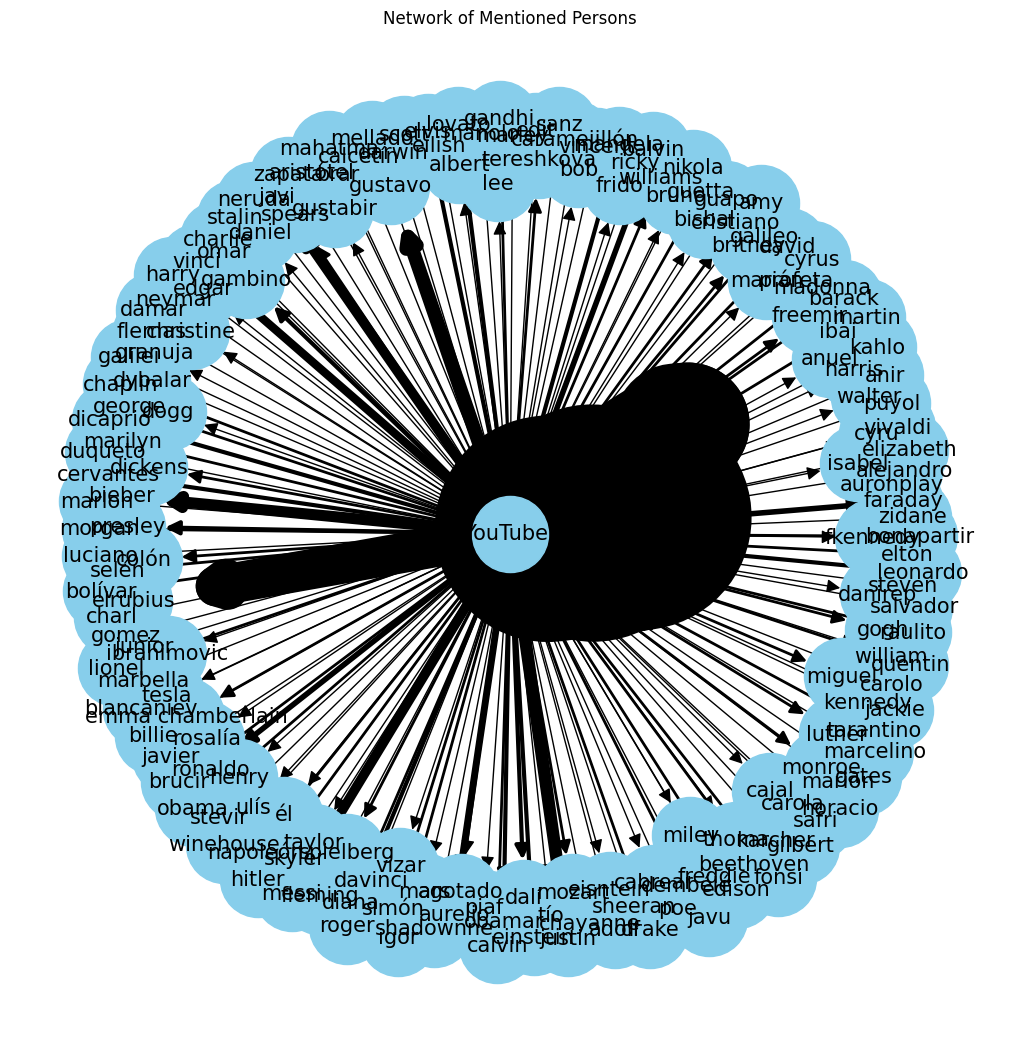

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('PER2_token.csv')

# Create a new directed graph from the dataframe
G = nx.from_pandas_edgelist(df, 'Source', 'Target', ['Weight'], create_using=nx.DiGraph())

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # using the spring layout
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=15, width=df['Weight'].values, arrowsize=20)
plt.title("Network of Mentioned Persons")
plt.show()


In [2]:
from pyvis.network import Network
import numpy as np

# Load your CSV
df = pd.read_csv('PER2_token.csv')

# Filter out rows with weight less than 3
df = df[df['Weight'] >= 3]

# Determine the 10th and 90th percentile weights
lower_bound = np.percentile(df['Weight'], 10)
upper_bound = np.percentile(df['Weight'], 90)

# Calculate cumulative weight for each target node
node_weights = df.groupby('Target')['Weight'].sum().to_dict()

# Normalize node sizes for visualization
min_node_size = 10
max_node_size = 50
node_sizes = {
    node: np.interp(weight, (min(node_weights.values()), max(node_weights.values())), (min_node_size, max_node_size))
    for node, weight in node_weights.items()
}

# Create a pyvis network
net = Network(notebook=True)

# Add nodes with sizes based on cumulative weights
for node in pd.concat([df['Source'], df['Target']]).unique():  # Ensure every unique node is added
    size = node_sizes.get(node, min_node_size)  # If a node doesn't have a cumulative weight, use the minimum size
    net.add_node(node, size=size)

# Add edges with widths based on individual weights
for index, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Weight']
    
    # Normalize edge width
    width = np.interp(weight, (lower_bound, upper_bound), (0.5, 5))
    
    net.add_edge(source, target, width=width)

# Display the network
net.show("network_preprocessed.html")




network_preprocessed.html


In [3]:
from IPython.display import display

# Sort the dataframe by 'Weight' in descending order
sorted_df = df.sort_values(by='Weight', ascending=False)

# Use pandas styling to highlight the 'Weight' column with a gradient and display the top rows (e.g., top 10)
display(sorted_df.head(10).style.background_gradient(cmap='Blues', subset=['Weight']))


,Source,Target,Weight
0,YouTuber,auronplay,163
4,YouTuber,ibai,89
1,YouTuber,elrubius,29
45,YouTuber,gustavo,10
136,YouTuber,justin,9
137,YouTuber,bieber,8
5,YouTuber,messi,7
46,YouTuber,javi,7
40,YouTuber,vinci,6
10,YouTuber,aurelio,5
